<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


##Load in data and clean up

In [0]:
# Import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [0]:
# Load the data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2019-09-17 22:54:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-17 22:54:38 (286 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
# Read in data and set column names
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants',
                          'water-project', 'budget', 'physician-fee-freeze', 
                          'el-salvador-aid', 'religious-groups', 
                          'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                          'immigration', 'synfuels', 'education', 
                          'right-to-sue','crime','duty-free', 'south-africa'])

In [0]:
# Clean data
df = df.replace({'y':1 , 'n':0, '?':np.nan})

In [0]:
df.head()

In [0]:
# Seperate data by Democrat or Republicn
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
dem.head()

In [0]:
rep.head()

## 1. Generate and numerically represent a confidence interval

In [0]:
# Confidence interval function

def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
# USED TO SEE HOW TO HANDLE CONVERTING TO NUMPY ARRAY IN FUNCTION LATER
test = dem.values
test

array([['democrat', nan, 1.0, ..., 1.0, 0.0, 0.0],
       ['democrat', 0.0, 1.0, ..., 0.0, 0.0, 1.0],
       ['democrat', 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       ...,
       ['democrat', nan, nan, ..., 0.0, 1.0, 1.0],
       ['democrat', 1.0, 0.0, ..., nan, 1.0, 1.0],
       ['democrat', 0.0, 0.0, ..., 0.0, 0.0, 1.0]], dtype=object)

In [0]:
# USED TO SEE HOW TO HANDLE CONVERTING TO NUMPY ARRAY IN FUNCTION LATER
test = dem.values.T
test

array([['democrat', 'democrat', 'democrat', ..., 'democrat', 'democrat',
        'democrat'],
       [nan, 0.0, 1.0, ..., nan, 1.0, 0.0],
       [1.0, 1.0, 1.0, ..., nan, 0.0, 0.0],
       ...,
       [1.0, 0.0, 1.0, ..., 0.0, nan, 0.0],
       [0.0, 0.0, 1.0, ..., 1.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0]], dtype=object)

In [0]:
# Confidence interval for dataframe function

def confidence_interval_df(x):
# Create list to hold means, lower bounds, and upper bounds
  CI_issue = []

# Convert dataframe into an array and transpose so we can compare the votes for
# each bill, rather than each congresspersons voting
  x = x.values.T

# For loop to fill CI_issue using confidence_interval function from above while
# avoiding NaN values using isnan (arrays are easy to work with!)
  for col in x:
    no_nans = col[~np.isnan(col)]
    CI_issue.append(confidence_interval(no_nans))
# Create dataframe from confidence_interval outputs for each issue    
  CI_issue = pd.DataFrame(CI_issue, columns=['Mean', 'Lower', 'Upper'])
# return the dataframe  
  return CI_issue

In [0]:
# Drop 'party' column from each dataframe to run confidence_interval_df (isnan
# doesn't like strings!)

dem_votes = dem.drop('party', axis=1)
rep_votes = rep.drop('party', axis=1)

In [0]:
# Run confidence_interval_df for both dem votes and rep votes
CI_dem = confidence_interval_df(dem_votes)
CI_rep = confidence_interval_df(rep_votes)

In [0]:
# Get the margin of error for each row and append to each dataframe
CI_dem['Margin of Error'] = CI_dem['Mean'] - CI_dem['Lower']
CI_rep['Margin of Error'] = CI_rep['Mean'] - CI_rep['Lower']

In [0]:
CI_dem

,Mean,Lower,Upper,Margin of Error
0,0.604651,0.544593,0.664710,0.060058
1,0.502092,0.438245,0.565939,0.063847
2,0.888462,0.849944,0.926980,0.038518
3,0.054054,0.026332,0.081776,0.027722
4,0.215686,0.164863,0.266509,0.050823
5,0.476744,0.415392,0.538097,0.061352
6,0.772201,0.720782,0.823620,0.051419
7,0.828897,0.783085,0.874710,0.045813
8,0.758065,0.704394,0.811735,0.053671
9,0.471483,0.410757,0.532208,0.060725


In [0]:
CI_rep

,Mean,Lower,Upper,Margin of Error
0,0.187879,0.127652,0.248106,0.060227
1,0.506757,0.425266,0.588248,0.081491
2,0.134146,0.081435,0.186857,0.052711
3,0.987879,0.971007,1.004751,0.016872
4,0.951515,0.918398,0.984632,0.033117
5,0.897590,0.850987,0.944193,0.046603
6,0.240741,0.174201,0.307281,0.066540
7,0.152866,0.095955,0.209778,0.056911
8,0.115152,0.065935,0.164368,0.049217
9,0.557576,0.480996,0.634156,0.076580


## 2. Graphically (with a plot) represent the confidence interval

In [0]:
CI_dem.head()

,Mean,Lower,Upper,Margin of Error
0,0.604651,0.544593,0.664710,0.060058
1,0.502092,0.438245,0.565939,0.063847
2,0.888462,0.849944,0.926980,0.038518
3,0.054054,0.026332,0.081776,0.027722
4,0.215686,0.164863,0.266509,0.050823


In [0]:
# Let's make a column with bill names for easier graphing
CI_dem['Bill'] = ['handicapped-infants',
                          'water-project', 'budget', 'physician-fee-freeze', 
                          'el-salvador-aid', 'religious-groups', 
                          'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                          'immigration', 'synfuels', 'education', 
                          'right-to-sue','crime','duty-free', 'south-africa']
CI_rep['Bill'] = ['handicapped-infants',
                          'water-project', 'budget', 'physician-fee-freeze', 
                          'el-salvador-aid', 'religious-groups', 
                          'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                          'immigration', 'synfuels', 'education', 
                          'right-to-sue','crime','duty-free', 'south-africa']

In [0]:
# Check that our Bills lined up correctly as there have been a few transposes/
# changing of the dataframe throughout the notebook
CI_dem.head(10)

,Mean,Lower,Upper,Margin of Error,Bill
0,0.604651,0.544593,0.664710,0.060058,handicapped-infants
1,0.502092,0.438245,0.565939,0.063847,water-project
2,0.888462,0.849944,0.926980,0.038518,budget
3,0.054054,0.026332,0.081776,0.027722,physician-fee-freeze
4,0.215686,0.164863,0.266509,0.050823,el-salvador-aid
5,0.476744,0.415392,0.538097,0.061352,religious-groups
6,0.772201,0.720782,0.823620,0.051419,anti-satellite-ban
7,0.828897,0.783085,0.874710,0.045813,aid-to-contras
8,0.758065,0.704394,0.811735,0.053671,mx-missile
9,0.471483,0.410757,0.532208,0.060725,immigration


In [0]:
# Use .mean() to compare mean values to ensure Bill names are in the right rows
dem.mean()

handicapped-infants     0.604651
water-project           0.502092
budget                  0.888462
physician-fee-freeze    0.054054
el-salvador-aid         0.215686
religious-groups        0.476744
anti-satellite-ban      0.772201
aid-to-contras          0.828897
mx-missile              0.758065
immigration             0.471483
synfuels                0.505882
education               0.144578
right-to-sue            0.289683
crime                   0.350195
duty-free               0.637450
south-africa            0.935135
dtype: float64

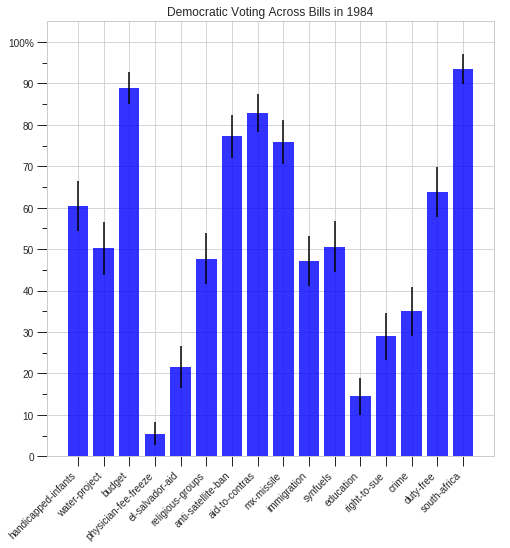

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('seaborn-whitegrid')
# Plot data on a bar graph with CI included
ax.bar('Bill', 'Mean', data=CI_dem, yerr='Margin of Error', color='b', alpha=.8)

### Make it look nice! ###
# Adjust yticks and labels
ax.set_yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
ax.set_yticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90',
                    '100%'])
ax.set_yticks([.05, .15, .25, .35, .45, .55, .65, .75, .85, .95], minor=True)
ax.tick_params(which='major', width=1.0, length=10)
ax.tick_params(which='minor', width=1.0, length=5)
ax.set_xticklabels(CI_dem['Bill'], rotation=45, ha='right')

ax.set_ylim(0,1.05)

ax.set_title('Democratic Voting Across Bills in 1984')
plt.show()

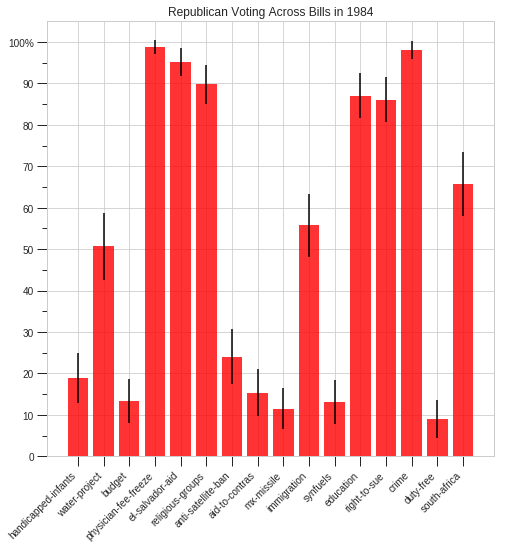

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('seaborn-whitegrid')
# Plot data on a bar graph with CI included
ax.bar('Bill', 'Mean', data=CI_rep, yerr='Margin of Error', color='r', alpha=.8)

### Make it look nice! ###
# Adjust yticks and labels
ax.set_yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
ax.set_yticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90',
                    '100%'])
ax.set_yticks([.05, .15, .25, .35, .45, .55, .65, .75, .85, .95], minor=True)
ax.tick_params(which='major', width=1.0, length=10)
ax.tick_params(which='minor', width=1.0, length=5)
ax.set_xticklabels(CI_rep['Bill'], rotation=45, ha='right')

ax.set_ylim(0,1.05)

ax.set_title('Republican Voting Across Bills in 1984')
plt.show()

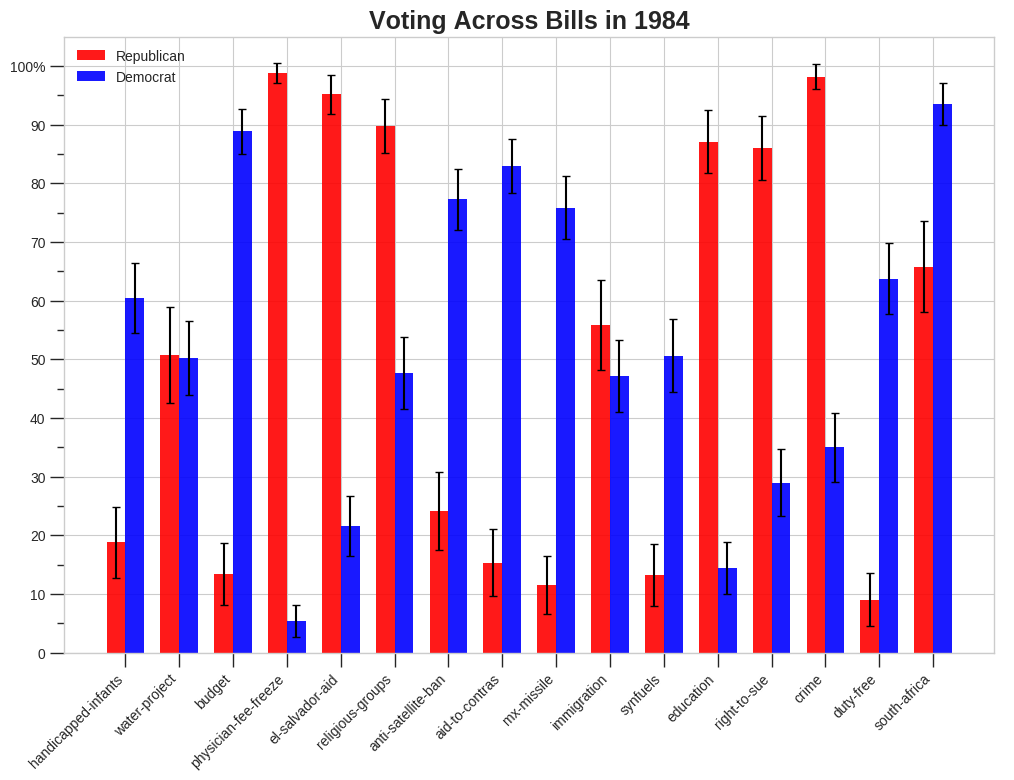

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('seaborn-whitegrid')

# Use width and align parameters to seperate bars
width = .35
# Plot data on a bar graph with CI included
ax.bar('Bill', 'Mean', -width, data=CI_rep, yerr='Margin of Error', color='red', 
       alpha=.9, align='edge', capsize=3, label='Republican')
ax.bar('Bill', 'Mean', +width, data=CI_dem, yerr='Margin of Error', color='blue', 
       alpha=.9, align='edge', capsize=3, label='Democrat')
### Make it look nice! ###
# Adjust yticks and labels
ax.set_yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
ax.set_yticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90',
                    '100%'])
ax.set_yticks([.05, .15, .25, .35, .45, .55, .65, .75, .85, .95], minor=True)
ax.tick_params(which='major', width=1.0, length=10)
ax.tick_params(which='minor', width=1.0, length=5)
ax.set_xticklabels(CI_rep['Bill'], rotation=45, ha='right')

#Set y_lim so some of the CI's don't get cut off
ax.set_ylim(0,1.05)
# Show legend since we have 2 different groups
ax.legend()
ax.set_title('Voting Across Bills in 1984', fontweight='bold', size=18)
plt.show()

## 3. Interpret the confidence interval - what does it tell you about the data and its distribution?

On the issues where the vote is closer to 50/50 we can see that the confidence interval is much larger, while the issues where voting was closer to unanimous the confidence interval is much smaller. This is very clear in the difference in size of the confidence intervals for the 'Water Project' bill and the 'Physician Free Freeze' bill on the Republican graph. I think in laymans terms this suggests that if there were to be a revote on these two bills the outcome for Physician freeze is expected to be about the same, while the Water project bill may have quite a different outcome.

## 4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [0]:
headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=headers)

# Data about harvested abalone's

In [0]:
print(df1.shape)
df1.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [0]:
df1.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [0]:
# Create bins for number of Rings
cut_rings = [0, 5, 10, 15, 20, 25, 30]
ring_names = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-29']
df1['Rings Categories'] = pd.cut(df1['Rings'], cut_rings, labels=ring_names)

In [0]:
df1.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Rings Categories
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,11-15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,6-10
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,6-10
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,6-10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,6-10


In [0]:
df1 = df1.sort_values(by=['Rings Categories'], ascending=True)
df1.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Rings Categories
2626,I,0.220,0.160,0.05,0.0490,0.0215,0.0100,0.015,4,0-5
524,M,0.235,0.160,0.06,0.0545,0.0265,0.0095,0.015,4,0-5
2719,I,0.360,0.260,0.08,0.1795,0.0740,0.0315,0.060,5,0-5
525,M,0.175,0.125,0.04,0.0240,0.0095,0.0060,0.005,4,0-5
526,M,0.155,0.110,0.04,0.0155,0.0065,0.0030,0.005,3,0-5


In [0]:
# Compare Whole Weight to ring counts with a crosstab
crosstab = pd.crosstab(df1['Sex'],df1['Rings Categories'], margins=True)

In [0]:
crosstab

Rings Categories,0-5,6-10,11-15,16-20,21-25,26-29,All
Sex,,,,,,,
F,4,668,513,102,18,2,1307
I,165,1022,131,23,1,0,1342
M,20,851,542,100,13,2,1528
All,189,2541,1186,225,32,4,4177


In [0]:
# Get row sums and column sums for expected values
row_sums = crosstab.iloc[0:3, 6].values
col_sums = crosstab.iloc[3, 0:6].values

[1307 1342 1528]
[ 189 2541 1186  225   32    4]


In [0]:
# Get total observations
total = crosstab.loc['All', 'All']
total

4177

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(3, 6)
[[ 59.13885564 795.08905913 371.10414173  70.40339957  10.01292794
    1.25161599]
 [ 60.72252813 816.38065597 381.0418961   72.28872396  10.28106296
    1.28513287]
 [ 69.13861623 929.53028489 433.85396217  82.30787647  11.7060091
    1.46325114]]


In [0]:
observed = pd.crosstab(df1['Sex'], df1['Rings Categories']).values
print(observed.shape)
observed

(3, 6)


array([[   4,  668,  513,  102,   18,    2],
       [ 165, 1022,  131,   23,    1,    0],
       [  20,  851,  542,  100,   13,    2]])

###Using Numpy

In [0]:
# chi_squared statistic
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 657.8480895498792


In [0]:
# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")    

Degrees of Freedom: 10


###Using Scipy

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 657.8480895498792
P-value: 6.97543112037277e-135
Degrees of Freedom: 10
Expected: 
 [[ 59.13885564 795.08905913 371.10414173  70.40339957  10.01292794
    1.25161599]
 [ 60.72252813 816.38065597 381.0418961   72.28872396  10.28106296
    1.28513287]
 [ 69.13861623 929.53028489 433.85396217  82.30787647  11.7060091
    1.46325114]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)